# Logistic Regression with Kick Starter Data

### Import data

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ks= pd.read_csv("ks-projects-201612.csv")

/Users/esther/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
ks.shape

(323750, 17)

In [4]:
ks.columns

Index([u'ID ', u'name ', u'category ', u'main_category ', u'currency ',
       u'deadline ', u'goal ', u'launched ', u'pledged ', u'state ',
       u'backers ', u'country ', u'usd pledged ', u'Unnamed: 13',
       u'Unnamed: 14', u'Unnamed: 15', u'Unnamed: 16'],
      dtype='object')

### Drop last 4 columns

In [5]:
ks = ks.iloc[:, :-4]

In [6]:
ks.columns

Index([u'ID ', u'name ', u'category ', u'main_category ', u'currency ',
       u'deadline ', u'goal ', u'launched ', u'pledged ', u'state ',
       u'backers ', u'country ', u'usd pledged '],
      dtype='object')

### Remove trailing spaces in column names

In [7]:
ks = ks.rename(columns=lambda x: x.strip())

In [8]:
ks.columns

Index([u'ID', u'name', u'category', u'main_category', u'currency', u'deadline',
       u'goal', u'launched', u'pledged', u'state', u'backers', u'country',
       u'usd pledged'],
      dtype='object')

In [9]:
ks['state'].value_counts()

failed        168221
successful    113081
canceled       32354
live            4428
undefined       3555
suspended       1479
0                 96
1                 15
25                11
5                 11
10                10
100                8
50                 7
65                 6
20                 5
35                 5
55                 5
2                  5
110                5
6                  4
21                 4
30                 4
125                3
200                3
390                3
130                3
150                3
90                 3
525                2
11044              2
               ...  
1410               1
300                1
301                1
306                1
16185              1
7326.46            1
8609.6             1
6093               1
12590              1
6091               1
8047               1
2718               1
5661               1
13                 1
16                 1
9951               1
201          

### Filter dataset down to state = failed & successful 

In [11]:
ks= ks[(ks['state']=="failed") | (ks['state']=="successful")]

In [63]:
ks.shape
# 42,448 rows dropped

(281302, 13)

In [12]:
ks['state'].value_counts()

failed        168221
successful    113081
Name: state, dtype: int64

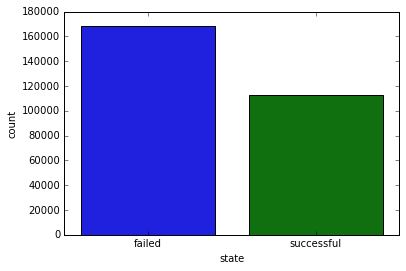

In [275]:
sns.countplot(x='state', data=ks)

In [13]:
set(ks['main_category'])

{'Art',
 'Comics',
 'Crafts',
 'Dance',
 'Design',
 'Fashion',
 'Film & Video',
 'Food',
 'Games',
 'Journalism',
 'Music',
 'Photography',
 'Publishing',
 'Technology',
 'Theater'}

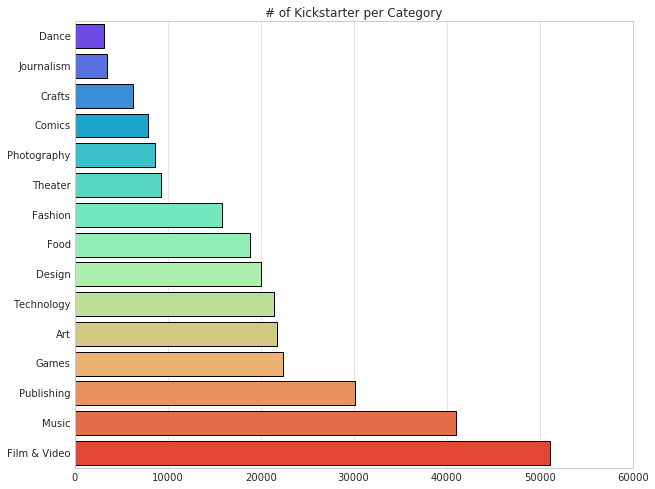

In [283]:
ks_cat= ks['main_category'].value_counts().sort_values()
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.barplot(y=ks_cat.index, x=ks_cat.values,palette='rainbow').set_title('# of Kickstarter per Category')

### Attack nulls!

In [22]:
ks.isnull().sum()

ID                 0
name               1
category           0
main_category      0
currency           0
deadline           0
goal               0
launched           0
pledged            0
state              0
backers            0
country            0
usd pledged      210
dtype: int64

In [27]:
null_name = ks['name'].isnull()
ks[null_name]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged
289847,796533179,NaN,Painting,Art,USD,2011-12-05 05:59:00,35000,2011-11-06 23:55:55,220,failed,5,US,220


In [29]:
ks['name'] = ks['name'].fillna(value="None")

In [38]:
ks['usd pledged'] = ks['usd pledged'].fillna(0)

In [39]:
ks.isnull().sum()
# YAY! No more nulls

ID               0
name             0
category         0
main_category    0
currency         0
deadline         0
goal             0
launched         0
pledged          0
state            0
backers          0
country          0
usd pledged      0
dtype: int64

### Convert dtypes

In [40]:
ks.dtypes

ID                int64
name             object
category         object
main_category    object
currency         object
deadline         object
goal             object
launched         object
pledged          object
state            object
backers          object
country          object
usd pledged      object
dtype: object

In [42]:
# grabbing numeric columns to convert
cols= ['goal', 'pledged', 'backers', 'usd pledged']
ks[cols] = ks[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [43]:
ks.dtypes

ID                 int64
name              object
category          object
main_category     object
currency          object
deadline          object
goal             float64
launched          object
pledged          float64
state             object
backers          float64
country           object
usd pledged      float64
dtype: object

### Convert currency to USD

In [106]:
set(ks['currency'])

#AUD .78
#CAD .79
#CHF 1.05
#DKK .17
#EUR 1.24
#GBP 1.42
#HKD .13
#MXN .055
#NOK .13
#NZD .74
#SEK .12
#SGD .76
#USD 1

{'AUD',
 'CAD',
 'CHF',
 'DKK',
 'EUR',
 'GBP',
 'HKD',
 'MXN',
 'NOK',
 'NZD',
 'SEK',
 'SGD',
 'USD'}

In [123]:
def convert_to_usd(cur, goal):
    if cur=='AUD':
        return goal*.78
    elif cur=='CAD':
        return goal*.79
    elif cur=='CHF':
        return goal*1.05
    elif cur=='DKK':
        return goal*.17
    elif cur=='EUR':
        return goal*1.24
    elif cur=='GBP':
        return goal*1.42
    elif cur=='HKD':
        return goal*.13
    elif cur=='MXN':
        return goal*.055
    elif cur=='NOK':
        return goal*.13
    elif cur=='NZD':
        return goal*.74
    elif cur=='SEK':
        return goal*.12
    elif cur=='SGD':
        return goal*.76
    return goal*1


ks['usd_goal']= ks.apply(lambda x: convert_to_usd(x['currency'], x['goal']), axis=1)

## I only converted the 'goal' column since the'usd pledged' column already exists

### Average goal, pledged, and backers per category

In [130]:
ks.pivot_table(index='main_category', values=['usd_goal', 'usd pledged', 'backers'], aggfunc=np.mean).round()

,backers,usd pledged,usd_goal
main_category,,,
Art,43.0,3072.0,35603.0
Comics,146.0,6825.0,23620.0
Crafts,30.0,1516.0,10416.0
Dance,45.0,3425.0,8197.0
Design,269.0,23159.0,41468.0
Fashion,70.0,5662.0,22797.0
Film & Video,73.0,6521.0,67477.0
Food,59.0,5222.0,49838.0
Games,387.0,22649.0,43672.0


### Data Visualization on Failed vs. Successful Kickstarters

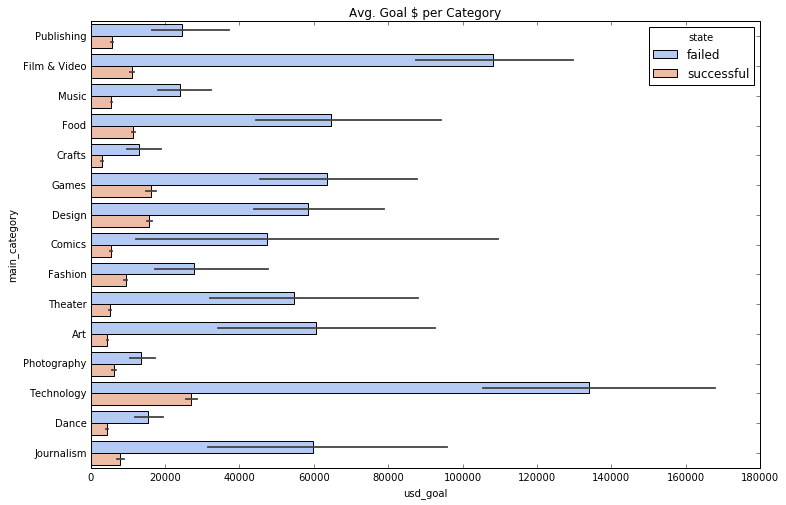

In [209]:
plt.figure(figsize=(12,8))
sns.barplot(y='main_category',x='usd_goal',data=ks,hue='state',palette='coolwarm').set_title('Avg. Goal $ per Category')

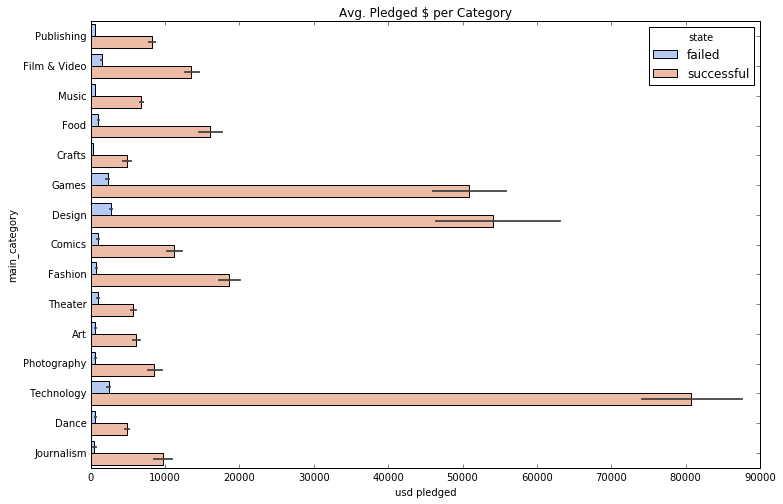

In [210]:
plt.figure(figsize=(12,8))
sns.barplot(y='main_category',x='usd pledged',data=ks,hue='state',palette='coolwarm').set_title('Avg. Pledged $ per Category')

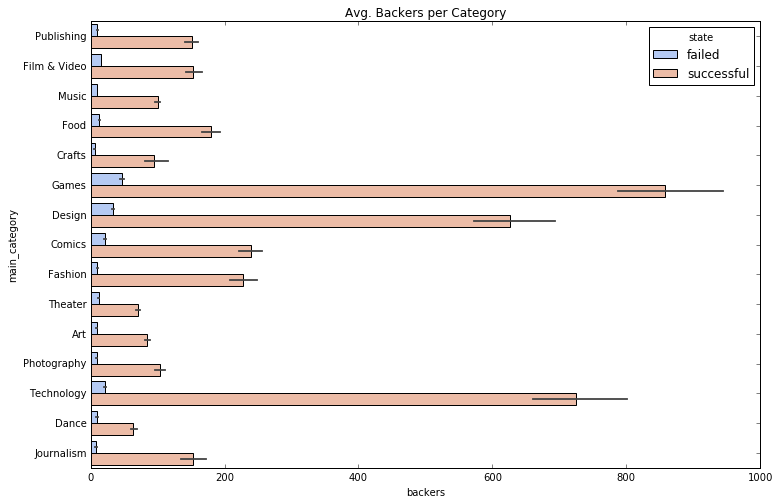

In [211]:
plt.figure(figsize=(12,8))
sns.barplot(y='main_category',x='backers',data=ks,hue='state',palette='coolwarm').set_title('Avg. Backers per Category')

In [134]:
x= ks.groupby(['main_category', 'state']).agg({'ID':'count', 'usd_goal':'mean', 'usd pledged': 'mean', 'backers': 'mean'})
x= x.rename(columns={'ID': 'Total_KS', 'usd_goal': 'Avg_Goal', 'usd pledged': 'Avg_Pledged', 'backers': 'Avg_Backers'})
x.round()

Avg_Goal  Avg_Backers  Total_KS  Avg_Pledged
main_category state                                                   
Art           failed       60459.0          9.0     12092        628.0
              successful    4470.0         85.0      9654       6134.0
Comics        failed       47491.0         21.0      3406        994.0
              successful    5549.0        240.0      4499      11239.0
Crafts        failed       13104.0          6.0      4630        302.0
              successful    2970.0         95.0      1671       4879.0
Dance         failed       15333.0         10.0      1089        619.0
              successful    4498.0         64.0      2101       4880.0
Design        failed       58446.0         33.0     12039       2725.0
              successful   15787.0        626.0      7959      54069.0
Fashion       failed       27785.0         10.0     11500        789.0
              successful    9485.0        228.0      4310      18664.0
Film & Video  failed      108185.0         15.0     29653       1497.0
              successful   11080.0        153.0     21404      13481.0
Food          failed       64682.0         13.0     13602       1053.0
              successful   11422.0        179.0      5256      16012.0
Games         failed       63500.0         47.0     13013       2315.0
              successful   16180.0        858.0      9385      50844.0
Journalism    failed       59707.0          8.0      2657        521.0
              successful    8018.0        153.0       869       9772.0
Music         failed       24083.0          9.0     19193        617.0
              successful    5594.0        100.0     21763       6828.0
Photography   failed       13589.0          9.0      5743        607.0
              successful    6261.0        104.0      2903       8546.0
Publishing    failed       24463.0         10.0     19920        604.0
              successful    5715.0        151.0     10255       8265.0
Technology    failed      134101.0         22.0     16347       2413.0
              successful   27014.0        724.0      5062      80690.0
Theater       failed       54646.0         12.0      3337        981.0
              successful    5139.0         71.0      5990       5714.0

### Clean country data

In [140]:
ks.groupby(['country', 'state'])['ID'].count()

country  state     
AT       failed           223
         successful        60
AU       failed          3733
         successful      1450
BE       failed           250
         successful        79
CA       failed          6832
         successful      3067
CH       failed           303
         successful        86
DE       failed          1600
         successful       530
DK       failed           441
         successful       231
ES       failed           847
         successful       242
FR       failed          1045
         successful       512
GB       failed         14480
         successful      9340
HK       failed            33
         successful        14
IE       failed           339
         successful       133
IT       failed          1162
         successful       232
LU       failed            20
         successful        13
MX       failed             2
         successful         2
N,"0     failed           105
         successful       105
NL       failed     

### Fix data error - where country == N,"0

In [144]:
ks[ks['country']=='N,"0']['currency'].value_counts()

USD    151
GBP     22
EUR     21
CAD      5
AUD      5
DKK      3
NOK      2
SEK      1
Name: currency, dtype: int64

In [150]:
## I will convert country=='N,"0' and currency=='EUR to country= DE
ks[ks['currency']=='EUR']['country'].value_counts()

DE      2130
NL      1869
FR      1557
IT      1394
ES      1089
IE       472
BE       329
AT       283
LU        33
N,"0      21
Name: country, dtype: int64

In [161]:
def update_country(cn, cur):
    if cn=='N,"0':
        if cur=='USD':
            return 'US'
        elif cur=='GBP':
            return 'GB'
        elif cur=='EUR':
            return 'DE'
        elif cur=='CAD':
            return 'CA'
        elif cur=='AUD':
            return 'AU'
        elif cur=='DKK':
            return 'DK'
        elif cur=='NOK':
            return 'NO'
        elif cur=='SEK':
            return 'SE'
    return cn
                        
ks['revised_country']= ks.apply(lambda x: update_country(x['country'], x['currency']), axis=1)

### Compute Success Rates per Country

In [254]:
df = pd.DataFrame(ks.groupby(['revised_country', 'state'])['ID'].count())
df = df.unstack()

df['ID', 'country_success_rate'] = (df['ID', 'successful'] / (df['ID', 'failed']+ df['ID', 'successful']))*100
df['ID','total_success_rate'] = (df['ID','successful'] / 113081)*100

In [336]:
df

ID                                                   
state            failed successful country_success_rate total_success_rate
revised_country                                                           
AT                  223         60            21.201413           0.053059
AU                 3737       1451            27.968389           1.283151
BE                  250         79            24.012158           0.069861
CA                 6834       3070            30.997577           2.714868
CH                  303         86            22.107969           0.076052
DE                 1617        534            24.825662           0.472228
DK                  442        233            34.518519           0.206047
ES                  847        242            22.222222           0.214006
FR                 1045        512            32.883751           0.452773
GB                14488       9354            39.233286           8.271947
HK                   33         14            29.787234           0.012381
IE                  339        133            28.177966           0.117615
IT                 1162        232            16.642755           0.205163
LU                   20         13            39.393939           0.011496
MX                    2          2            50.000000           0.001769
NL                 1459        410            21.936865           0.362572
NO                  323        109            25.231481           0.096391
NZ                  662        330            33.266129           0.291826
SE                  731        335            31.425891           0.296248
SG                   37         32            46.376812           0.028298
US               133667      95850            41.761612          84.762250

### Read and merge country data

In [260]:
code= pd.read_csv("Country_List_ISO_3166_Codes_Latitude_Longitude.csv")
code = code[['Alpha-2 code','Country','Latitude (average)', 'Longitude (average)']]
code.head()
code.columns

Index([u'Alpha-2 code', u'Country', u'Latitude (average)',
       u'Longitude (average)'],
      dtype='object')

In [313]:
df2 =pd.merge(df, code, how='inner', left_index=True, right_on='Alpha-2 code').set_index(df.index)
df2.drop('Alpha-2 code', axis=1)

,"(ID, failed)","(ID, successful)","(ID, country_success_rate)","(ID, total_success_rate)",Country,Latitude (average),Longitude (average)
revised_country,,,,,,,
AT,223,60,21.201413,0.053059,Austria,47.3333,13.3333
AU,3737,1451,27.968389,1.283151,Australia,-27.0000,133.0000
BE,250,79,24.012158,0.069861,Belgium,50.8333,4.0000
CA,6834,3070,30.997577,2.714868,Canada,60.0000,-95.0000
CH,303,86,22.107969,0.076052,Switzerland,47.0000,8.0000
DE,1617,534,24.825662,0.472228,Germany,51.0000,9.0000
DK,442,233,34.518519,0.206047,Denmark,56.0000,10.0000
ES,847,242,22.222222,0.214006,Spain,40.0000,-4.0000
FR,1045,512,32.883751,0.452773,France,46.0000,2.0000


## Prepare for Logistic Regression

### 1. Convert categorical features to dummy variables 

In [285]:
results= pd.get_dummies(ks['state'], drop_first=True)
results.head()

,successful
0,0.0
1,0.0
2,0.0
4,1.0
5,1.0


In [286]:
cat = pd.get_dummies(ks['main_category'], drop_first=True)
cat.head()

,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [291]:
country = pd.get_dummies(ks['revised_country'], drop_first=True)
country.head(2)

,AU,BE,CA,CH,DE,DK,ES,FR,GB,HK,IE,IT,LU,MX,NL,NO,NZ,SE,SG,US
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### 2. Combine variables necessary for the model

In [297]:
model= ks[['usd_goal', 'usd pledged', 'backers']]
model = pd.concat([model, results, cat, country], axis=1)
model.shape

(281302, 38)

In [296]:
model.head(2)

,usd_goal,usd pledged,backers,successful,Comics,Crafts,Dance,Design,Fashion,Film & Video,...,IE,IT,LU,MX,NL,NO,NZ,SE,SG,US
0,1420.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,45000.0,220.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [298]:
X= model.drop('successful', axis=1)
y= model['successful']

### 3. Split data to train/test sets

In [299]:
from sklearn.cross_validation import train_test_split

In [300]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=101)

### 4. Build, fit, predict model

In [301]:
from sklearn.linear_model import LogisticRegression

In [303]:
log= LogisticRegression()

In [304]:
log.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [305]:
predictions= log.predict(X_test)

### 5. Review model accuracy : classification report and confusion matrix

In [306]:
from sklearn.metrics import classification_report

In [308]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

        0.0       0.98      0.96      0.97     50281
        1.0       0.95      0.98      0.96     34110

avg / total       0.97      0.97      0.97     84391



In [309]:
from sklearn.metrics import confusion_matrix

In [310]:
confusion_matrix(y_test, predictions)

array([[48378,  1903],
       [  759, 33351]])